In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Import the requests library.
import requests

# Import the API key. Config file should be in same folder as this API_practice file.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maxixe
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | luqiao
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | rawson
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | porto seguro
Processing Record 16 of Set 1 | panjakent
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | grand gaube
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | vestmannaeyjar
Processing Record 22 of Set 1 | maltahohe
Processing Record 23 of S

Processing Record 39 of Set 4 | vao
Processing Record 40 of Set 4 | kayattar
Processing Record 41 of Set 4 | morro bay
Processing Record 42 of Set 4 | riachao
Processing Record 43 of Set 4 | buchanan
Processing Record 44 of Set 4 | buraydah
Processing Record 45 of Set 4 | preeceville
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | manokwari
Processing Record 50 of Set 4 | hihifo
City not found. Skipping...
Processing Record 1 of Set 5 | ribeira grande
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | airai
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | pangoa
Processing Record 6 of Set 5 | kandi
Processing Record 7 of Set 5 | karratha
Processing Record 8 of Set 5 | havre-saint-pierre
Processing Record 9 of Set 5 | oriental
Processing Record 10 of Set 5 | urusha
Processing Record 11 of Set 5 | san patric

Processing Record 26 of Set 8 | peleduy
Processing Record 27 of Set 8 | hokitika
Processing Record 28 of Set 8 | sault sainte marie
Processing Record 29 of Set 8 | yanan
City not found. Skipping...
Processing Record 30 of Set 8 | saldus
Processing Record 31 of Set 8 | sol-iletsk
Processing Record 32 of Set 8 | tres arroyos
Processing Record 33 of Set 8 | sovetskiy
Processing Record 34 of Set 8 | berdigestyakh
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | san policarpo
Processing Record 37 of Set 8 | bairiki
Processing Record 38 of Set 8 | tual
Processing Record 39 of Set 8 | mokhsogollokh
Processing Record 40 of Set 8 | krasnoselkup
Processing Record 41 of Set 8 | makokou
Processing Record 42 of Set 8 | katsuura
Processing Record 43 of Set 8 | nilanga
Processing Record 44 of Set 8 | eldikan
City not found. Skipping...
Processing Record 45 of Set 8 | kavieng
Processing Record 46 of Set 8 | kendari
Processing Record 47 of Set 8 | buseresere
Processing Record 48 o

Processing Record 12 of Set 12 | boguchany
Processing Record 13 of Set 12 | kahului
Processing Record 14 of Set 12 | jalingo
Processing Record 15 of Set 12 | hamada
Processing Record 16 of Set 12 | ustye
Processing Record 17 of Set 12 | ust-bolsheretsk
City not found. Skipping...
Processing Record 18 of Set 12 | surin
Processing Record 19 of Set 12 | sofiysk
City not found. Skipping...
Processing Record 20 of Set 12 | candido mendes
Processing Record 21 of Set 12 | aflu
City not found. Skipping...
Processing Record 22 of Set 12 | lulea
Processing Record 23 of Set 12 | auki
Processing Record 24 of Set 12 | comodoro rivadavia
Processing Record 25 of Set 12 | sinnamary
Processing Record 26 of Set 12 | aksarka
Processing Record 27 of Set 12 | curup
Processing Record 28 of Set 12 | lorengau
Processing Record 29 of Set 12 | mweka
Processing Record 30 of Set 12 | beruni
City not found. Skipping...
Processing Record 31 of Set 12 | ginda
Processing Record 32 of Set 12 | birin
Processing Record 

In [11]:
# Tallying the number of cities in the city_data array to make sure its > 500.
len(city_data)

554

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maxixe,-23.8597,35.3472,67.68,79,2,6.93,MZ,2022-07-12 18:10:48
1,Nikolskoye,59.7035,30.7861,71.87,90,94,6.24,RU,2022-07-12 18:10:48
2,Luqiao,28.5808,121.3772,82.02,96,72,6.08,CN,2022-07-12 18:10:48
3,Thompson,55.7435,-97.8558,76.98,27,5,3.38,CA,2022-07-12 18:10:49
4,Albany,42.6001,-73.9662,90.27,51,50,1.99,US,2022-07-12 18:09:29
5,Saint-Philippe,-21.3585,55.7679,67.59,72,27,14.09,RE,2022-07-12 18:10:50
6,Mar Del Plata,-38.0023,-57.5575,55.09,53,30,8.99,AR,2022-07-12 18:10:30
7,Rawson,-43.3002,-65.1023,51.94,40,74,16.89,AR,2022-07-12 18:10:50
8,Esperance,-33.8667,121.9000,52.36,55,0,6.78,AU,2022-07-12 18:10:50
9,Kapaa,22.0752,-159.3190,78.78,77,100,18.41,US,2022-07-12 18:10:51


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maxixe,MZ,2022-07-12 18:10:48,-23.8597,35.3472,67.68,79,2,6.93
1,Nikolskoye,RU,2022-07-12 18:10:48,59.7035,30.7861,71.87,90,94,6.24
2,Luqiao,CN,2022-07-12 18:10:48,28.5808,121.3772,82.02,96,72,6.08
3,Thompson,CA,2022-07-12 18:10:49,55.7435,-97.8558,76.98,27,5,3.38
4,Albany,US,2022-07-12 18:09:29,42.6001,-73.9662,90.27,51,50,1.99
5,Saint-Philippe,RE,2022-07-12 18:10:50,-21.3585,55.7679,67.59,72,27,14.09
6,Mar Del Plata,AR,2022-07-12 18:10:30,-38.0023,-57.5575,55.09,53,30,8.99
7,Rawson,AR,2022-07-12 18:10:50,-43.3002,-65.1023,51.94,40,74,16.89
8,Esperance,AU,2022-07-12 18:10:50,-33.8667,121.9000,52.36,55,0,6.78
9,Kapaa,US,2022-07-12 18:10:51,22.0752,-159.3190,78.78,77,100,18.41


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

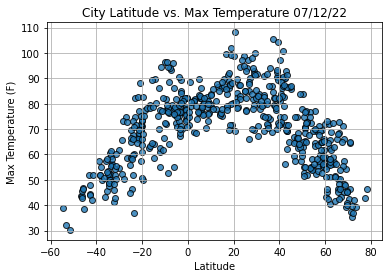

In [17]:
# Scatter plot needs current date in the title.
# To get current date, need to import time module (a standard module so no need to install)
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. Time will appear like a datetime stamp
# so should convert it to string format method: strftime()
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

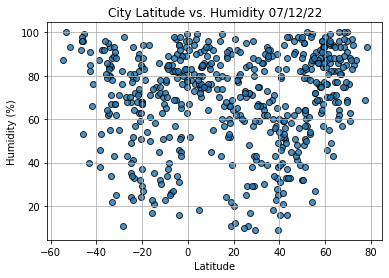

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. Time will appear like a datetime stamp
# so should convert it to string format method: strftime()
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

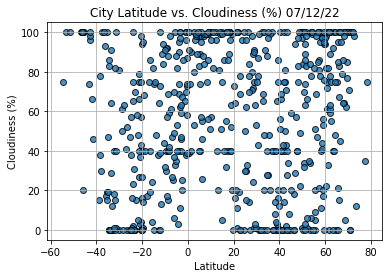

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. Time will appear like a datetime stamp
# so should convert it to string format method: strftime()
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

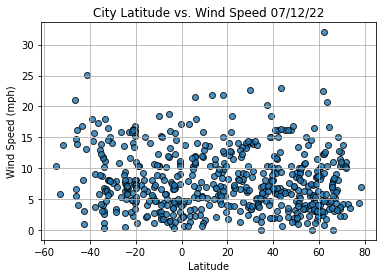

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. Time will appear like a datetime stamp
# so should convert it to string format method: strftime()
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()